#  E-commerce Recomendation system

# Abstract:

Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

# Objective:
The primary goal of implementing an e-commerce recommendation system is to enhance the overall user experience, increase customer satisfaction, and drive revenue by providing personalized product recommendations. The system aims to understand user preferences and behaviors to offer relevant and enticing suggestions, ultimately leading to higher engagement and conversion rates.

# Approach:

Data Collection:

Gather relevant data on user interactions, such as browsing history, purchase patterns, and product views.
Collect additional contextual data, including time of day, location, and device type, to enrich the recommendation algorithms.
Data Preprocessing:

Clean and preprocess the collected data to handle missing values, outliers, and ensure data consistency.
Transform categorical data into numerical formats and normalize numerical features for improved model performance.
User Profiling:

Develop user profiles based on historical data, considering factors like preferences, demographics, and behavior.
Utilize clustering techniques to group users with similar preferences, facilitating more accurate recommendations.
Content-Based Filtering:

Implement a content-based filtering approach to recommend products based on their attributes and the user's historical preferences.
Leverage natural language processing (NLP) techniques to analyze product descriptions and extract relevant features.
Collaborative Filtering:

Employ collaborative filtering methods to recommend products based on the preferences and behaviors of similar users.
Implement user-based and item-based collaborative filtering algorithms to enhance recommendation accuracy.
Matrix Factorization:

Explore matrix factorization techniques such as Singular Value Decomposition (SVD) or Alternating Least Squares (ALS) to capture latent features and improve recommendation quality.
Real-Time Recommendation Engine:

Develop a real-time recommendation engine that adapts to user behavior on-the-fly.
Utilize streaming data processing and update the recommendation models dynamically to provide timely and relevant suggestions.
Evaluation and Optimization:

Implement metrics such as precision, recall, and Mean Average Precision (MAP) to evaluate the performance of the recommendation system.
Continuously optimize the models based on user feedback and evolving trends in the e-commerce domain.
A/B Testing:

Conduct A/B testing to assess the impact of the recommendation system on user engagement and conversion rates.
Iterate and refine the algorithms based on the results of A/B tests to maximize the system's effectiveness.
Scalability and Deployment:

Ensure that the recommendation system is scalable to handle increasing volumes of data and user interactions.
Deploy the system in a production environment, considering factors like latency, reliability, and scalability.
By adopting this comprehensive approach, the e-commerce recommendation system aims to deliver personalized and effective product suggestions, ultimately driving customer satisfaction and business success.

# Dataset:

We are using the Electronics dataset from the Amazon Reviews data repository, which has several datasets.

## Attribute Information

- userId: Every user identified with a unique id
- productId: Every product identified with a unique id
- Rating: Rating of the corresponding product by the corresponding user
- timestamp: Time of the rating ( ignore this column for this exercise)

# Import required libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from sklearn.externals import joblib
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings;
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Import

In [2]:
#Read and explore the dataset. 
#Import the data set
col=['product_id', 'product_name', 'category', 'rating', 'rating_count',
       'about_product', 'user_id',  'review_title',
       'review_content']
df1 = pd.read_csv(r'C:\Users\Rayan\OneDrive\GreatLearning_AI_with_DeepLearning\recomendation_system\amazon\amazon.csv',usecols=col)#, header=None)

In [3]:
df1.head()      

,product_id,product_name,category,rating,rating_count,about_product,user_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      1465 non-null   object
 1   product_name    1465 non-null   object
 2   category        1465 non-null   object
 3   rating          1465 non-null   object
 4   rating_count    1463 non-null   object
 5   about_product   1465 non-null   object
 6   user_id         1465 non-null   object
 7   review_title    1465 non-null   object
 8   review_content  1465 non-null   object
dtypes: object(9)
memory usage: 103.1+ KB


### Preprocessing : 

In [5]:
df1['rating_count'].unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [6]:
df1['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [7]:
# divided category int main category and sub category 
cat_df=df1[['product_id','product_name','user_id']]
cat_df['cat_1']=df1['category'].astype(str).str.split('|').str[0]
cat_df['cat_2']=df1['category'].astype(str).str.split('|').str[-1]

cat_df['rating']=df1['rating'].str.replace('|','4').astype(float)
cat_df['rating_count']=df1['rating_count'].str.replace(',','').astype(float)
cat_df['review']=df1['review_content']

In [8]:
cat_df.groupby('cat_1')['rating'].aggregate(['mean','count']).sort_values(by='count',ascending=False)

,mean,count
cat_1,,
Electronics,4.081749,526
Computers&Accessories,4.154967,453
Home&Kitchen,4.040625,448
OfficeProducts,4.309677,31
HomeImprovement,4.250000,2
MusicalInstruments,3.900000,2
Car&Motorbike,3.800000,1
Health&PersonalCare,4.000000,1
Toys&Games,4.300000,1


In [9]:
# filtering the dataset for categories which more in sales. 
g_cat=cat_df.groupby('cat_1')['rating'].aggregate(['mean','count']).sort_values(by='count',ascending=False)['count'].ge(30).astype(int)
cat_index=g_cat[g_cat==1].index.tolist()
print(cat_index)


['Electronics', 'Computers&Accessories', 'Home&Kitchen', 'OfficeProducts']


In [10]:
cat_df=cat_df[cat_df.cat_1.isin(cat_index)]

In [11]:
# filtering the dataset for categories which more in sales. This step only to make the data less sparse. fell free to keep it out or preprocess. 
g_cat2=cat_df.groupby('cat_2')['rating'].aggregate(['mean','count']).sort_values(by='count',ascending=False)['count'].ge(20).astype(int)
sub_cat=g_cat2[g_cat2==1].index.tolist()
print(sub_cat)
cat_df=cat_df[cat_df.cat_2.isin(sub_cat)]

['USBCables', 'SmartWatches', 'Smartphones', 'SmartTelevisions', 'In-Ear', 'RemoteControls', 'MixerGrinders', 'Mice', 'DryIrons', 'HDMICables', 'InstantWaterHeaters', 'LintShavers', 'FanHeaters', 'ElectricHeaters']


In [12]:
cat_df.head(2)

,product_id,product_name,user_id,cat_1,cat_2,rating,rating_count,review
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Computers&Accessories,USBCables,4.2,24269.0,Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers&Accessories,USBCables,4.0,43994.0,I ordered this cable to connect my phone to An...


In [13]:
print(cat_df.shape)
print(cat_df.columns)

(725, 8)
Index(['product_id', 'product_name', 'user_id', 'cat_1', 'cat_2', 'rating',
       'rating_count', 'review'],
      dtype='object')


<Axes: xlabel='cat_1', ylabel='count'>

Text(0.5, 0, 'Main categories')

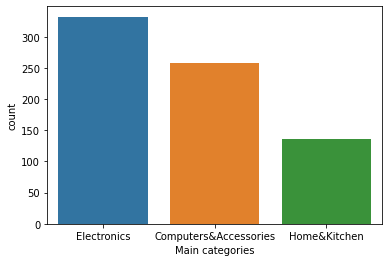

In [14]:
sns.countplot(data=cat_df,x='cat_1',order=cat_df.cat_1.value_counts().index)
plt.xlabel('Main categories')

<Axes: xlabel='cat_1', ylabel='rating'>

Text(0.5, 0, 'Main categories')

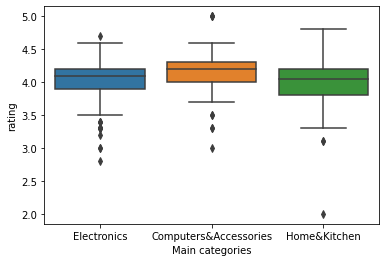

In [15]:
sns.boxplot(data=cat_df,x='cat_1',y='rating',order=cat_df.cat_1.value_counts().index)
plt.xlabel('Main categories')

<Axes: xlabel='rating', ylabel='cat_2'>

Text(0, 0.5, 'sub categories')

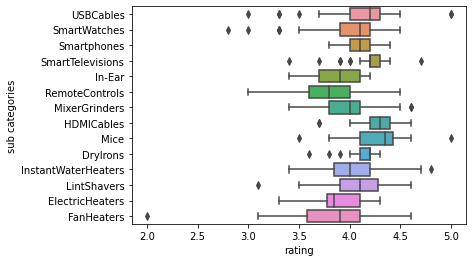

In [16]:
sns.boxplot(data=cat_df,y='cat_2',x='rating',order=cat_df.cat_2.value_counts().index)
plt.ylabel('sub categories')

<Axes: xlabel='count', ylabel='cat_2'>

Text(0, 0.5, 'sub categories')

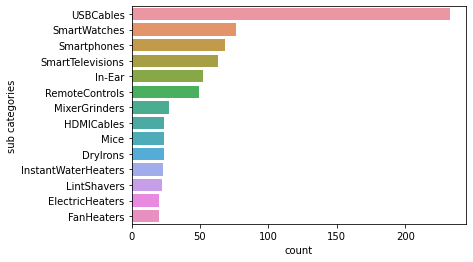

In [17]:
sns.countplot(data=cat_df,y='cat_2',order=cat_df.cat_2.value_counts().index)
plt.ylabel('sub categories')

# Content_based Recommendation 

In [18]:
cat_df_r=cat_df.copy()

In [19]:
# Rake nltk will prepare the text data
from rake_nltk import Rake

In [20]:
# initializing the new column
Key_words=[]
for index, row in cat_df.iterrows():
    plot = row['product_name']+row['review']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    #print(list(key_words_dict_scores.keys()))
    Key_words.append(list(key_words_dict_scores.keys()))
    
cat_df_r['Key_words']=Key_words    


In [21]:
# dropping the Plot column
cat_df_r.drop(columns = ['product_name','review'], inplace = True)

In [22]:
cat_df_r.set_index('product_id', inplace = True)
cat_df_r.head(2)

,user_id,cat_1,cat_2,rating,rating_count,Key_words
product_id,,,,,,
B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Computers&Accessories,USBCables,4.2,24269.0,"[wayona, nylon, braided, usb, lightning, fast,..."
B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers&Accessories,USBCables,4.0,43994.0,"[ambrane, unbreakable, 60w, 3a, fast, charging..."


In [23]:
# creating the bag of workds from all text columns

In [24]:
bag_of_words = []
columns = ['cat_1','cat_2','Key_words']
for index, row in cat_df_r.iterrows():
    words = ''
    for col in columns:
        if col == 'Key_words':
            words = words + ' '.join(row[col])+ ' '
        else:    
            words = words + row[col]+ ' '
    bag_of_words.append(words)
cat_df_r['bag_of_words']=bag_of_words
cat_df_r['bag_of_words']=cat_df_r['bag_of_words'].apply(lambda x:x.replace("...",''))
cat_df_r['bag_of_words']=cat_df_r['bag_of_words'].apply(lambda x:x.replace("---",''))
cat_df_r['bag_of_words'][0]

'Computers&Accessories USBCables wayona nylon braided usb lightning fast charging data sync cable compatible iphone 13 12 11 x 8 7 6 5 ipad air pro mini 3 ft pack 1 grey looks durable fine toono complains really good product ., till satisfied quality speed slower original would recommend https :// media amazon com images w webp_402378 t1 81  f1zghl _sy88 jpg worked well date issue also sturdy enough  asked replacement company , value money '

In [25]:
cat_df_r.drop(columns = [col for col in columns if col!= 'bag_of_words'], inplace = True)

In [26]:
# instantiating and generating the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
count_matrix = count.fit_transform(cat_df_r['bag_of_words'])

# list I will use later to match the indexes
indices = pd.Series(cat_df_r.index)
indices[:5]

0    B07JW9H4J1
1    B098NS6PVG
2    B096MSW6CT
3    B08HDJ86NZ
4    B08CF3B7N1
Name: product_id, dtype: object

In [27]:
# convert into dense 
c=count_matrix.todense()
c.shape

(725, 9135)

In [28]:
#example of words 
count.vocabulary_

{'computers': 2346,
 'accessories': 958,
 'usbcables': 8425,
 'wayona': 8664,
 'nylon': 5688,
 'braided': 1767,
 'usb': 8420,
 'lightning': 4921,
 'fast': 3474,
 'charging': 2094,
 'data': 2668,
 'sync': 7862,
 'cable': 1915,
 'compatible': 2310,
 'iphone': 4554,
 '13': 131,
 '12': 95,
 '11': 83,
 'ipad': 4552,
 'air': 1092,
 'pro': 6326,
 'mini': 5340,
 'ft': 3748,
 'pack': 5899,
 'grey': 3993,
 'looks': 5019,
 'durable': 3075,
 'fine': 3565,
 'toono': 8127,
 'complains': 2323,
 'really': 6606,
 'good': 3921,
 'product': 6363,
 'till': 8077,
 'satisfied': 7044,
 'quality': 6494,
 'speed': 7539,
 'slower': 7397,
 'original': 5836,
 'would': 8860,
 'recommend': 6642,
 'https': 4278,
 'media': 5237,
 'amazon': 1152,
 'com': 2257,
 'images': 4341,
 'webp_402378': 8682,
 't1': 7872,
 '81': 810,
 'f1zghl': 3417,
 '_sy88': 889,
 'jpg': 4664,
 'worked': 8836,
 'well': 8707,
 'date': 2669,
 'issue': 4589,
 'also': 1130,
 'sturdy': 7724,
 'enough': 3238,
 'asked': 1325,
 'replacement': 6766,
 '

In [29]:
# find the similarity using cosine similarity 
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim.shape

(725, 725)

In [30]:
def recommendations(product, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == product].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    #print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cat_df_r.index)[i])
        
    return recommended_movies

In [31]:
recommendations('B08HDJ86NZ')

['B08HDJ86NZ',
 'B08HDJ86NZ',
 'B08HDH26JX',
 'B07CRL2GY6',
 'B0789LZTCJ',
 'B0789LZTCJ',
 'B09RX1FK54',
 'B09RWZRCP1',
 'B09RWZRCP1',
 'B08Y1TFSP6']

In [32]:
cat_df[cat_df.product_id.isin(recommendations('B08HDJ86NZ'))]['product_name']

3      boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
5      pTron Solero TB301 3A Type-C Data and Fast Cha...
11     boAt Rugged v3 Extra Tough Unbreakable Braided...
74     boAt Type C A750 Stress Resistant, Tangle-free...
92     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
113    boAt Type C A750 Stress Resistant, Tangle-free...
258    boAt Rugged V3 Braided Micro USB Cable (Pearl ...
392    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
403    pTron Solero TB301 3A Type-C Data and Fast Cha...
443    boAt Rugged v3 Extra Tough Unbreakable Braided...
628    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
642    pTron Solero TB301 3A Type-C Data and Fast Cha...
985    boAt Type C A750 Stress Resistant, Tangle-free...
Name: product_name, dtype: object

In [33]:
indices[indices == 'B08HDJ86NZ'].index[0]

3

In [34]:
pd.Series(cosine_sim[indices[indices == 'B08HDJ86NZ'].index[0]])

0      0.201556
1      0.293316
2      0.287085
3      1.000000
4      0.232452
         ...   
720    0.120727
721    0.071611
722    0.112353
723    0.104595
724    0.042544
Length: 725, dtype: float64

# Build Popularity Recommender model. 

In [129]:
df3=cat_df[cat_df.rating_count >=1].dropna()

In [130]:
df2=df3[['user_id','product_id','rating']].rename(columns={'user_id':'userid','product_id':'productid'})


In [131]:
df2.head()

,userid,productid,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     723 non-null    object 
 1   productid  723 non-null    object 
 2   rating     723 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.6+ KB


In [132]:
users=df2.userid.str.split(',',expand=False).explode()
df=pd.merge(users,df2[['productid','rating']],left_index=True, right_index=True).reset_index()
df.isna().sum()
print(df.shape)

index        0
userid       0
productid    0
rating       0
dtype: int64

(5633, 4)


### Popularity Filtering:
- A Popularity Recommender is like a popularity contest for items. It suggests things that many people like. For example, if a lot of people watch and like a certain movie, the Popularity Recommender will suggest that movie to new users because it's popular.
- Example:
If everyone in a class likes a particular book, the teacher might recommend that book to a new student because it's popular among the class.
- How it works:

    - Count Popularity: The model counts how many times each item (movie, song, product, etc.) has been chosen or interacted with by users in the entire dataset.

    - Rank Items: It ranks items based on their popularity, putting the most popular ones at the top.

    - Recommendation: When a new user comes in, the model recommends the top-ranked items because they are popular among the general user population.
- Pros and Cons:

Pros: Simple to implement, doesn't require detailed user information.
Cons: May not provide personalized recommendations, ignores individual preferences.

In [40]:
df_final=df.groupby(['userid','productid'])['rating'].mean().reset_index()

In [41]:
#Sort the products on recommendation score 
def popular_recommend(data,k=10):
    data_grouped = data.groupby('productid').agg({'userid': 'count'}).reset_index()
    data_grouped.rename(columns = {'userid': 'score'},inplace=True)
    data_sort = data_grouped.sort_values(['score', 'productid'], ascending = [0,1]) 
        
    #Generate a recommendation rank based upon score 
    data_sort['Rank'] = data_sort['score'].rank(ascending=0, method='first') 
            
    #Get the top 5 recommendations 
    popularity_recommendations = data_sort.head(k) 
    return popularity_recommendations
popularity_recommendations =popular_recommend(df_final,k=10)

In [42]:
print(f"recomendation based on popularity:\n{popularity_recommendations}\n")

recomendation based on popularity:
      productid  score  Rank
281  B08WRBG3XW      9   1.0
314  B097R25DP7      9   2.0
406  B09NVPSCQT      9   3.0
450  B09V12K8NT      9   4.0
481  B09YV4MW2T      9   5.0
489  B09ZQK9X8G      9   6.0
0    B003L62T7W      8   7.0
1    B004IO5BMQ      8   8.0
2    B008FWZGSG      8   9.0
3    B008YW3CYM      8  10.0



In [43]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [44]:
find_recom = [10,15,1000]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 10

     userID   productid  score  Rank
281      10  B08WRBG3XW      9   1.0
314      10  B097R25DP7      9   2.0
406      10  B09NVPSCQT      9   3.0
450      10  B09V12K8NT      9   4.0
481      10  B09YV4MW2T      9   5.0
489      10  B09ZQK9X8G      9   6.0
0        10  B003L62T7W      8   7.0
1        10  B004IO5BMQ      8   8.0
2        10  B008FWZGSG      8   9.0
3        10  B008YW3CYM      8  10.0


Here is the recommendation for the userId: 15

     userID   productid  score  Rank
281      15  B08WRBG3XW      9   1.0
314      15  B097R25DP7      9   2.0
406      15  B09NVPSCQT      9   3.0
450      15  B09V12K8NT      9   4.0
481      15  B09YV4MW2T      9   5.0
489      15  B09ZQK9X8G      9   6.0
0        15  B003L62T7W      8   7.0
1        15  B004IO5BMQ      8   8.0
2        15  B008FWZGSG      8   9.0
3        15  B008YW3CYM      8  10.0


Here is the recommendation for the userId: 1000

     userID   productid  score  Rank
28

#### Observation
This is a popularity-based recommendation model where recommendations are consistent for all users. We make predictions based on overall product popularity, without personalizing them for individual users.

# Build Collaborative Filtering model.

#### Collaborative Filtering:
  it is a recommendation systems to make automatic predictions about the preferences of a user by collecting preferences and information from many users (collaborating). 
- It is based on the idea that users who have agreed in the past tend to agree in the future.     

There are two main types of collaborative filtering:

- User-based Collaborative Filtering:


This method identifies users who are similar to you based on their preferences and recommends items that those similar users have liked. For example, if User A and User B have similar tastes and User A likes a movie, the system will recommend that movie to User B.

- Item-based Collaborative Filtering:

This method focuses on finding similarities between items rather than users. If a user likes Item X, the system recommends items similar to Item X. The similarity between items is determined by how often they are liked by the same users. If User A likes both Item X and Item Y, and User B likes Item X, the system might recommend Item Y to User B.
#### How Collaborative Filtering Works:

- User-item Matrix: Represent user preferences in a matrix where rows are users, columns are items, and the entries are ratings or preferences.

- Find Similar Users/Items: Identify users or items that are similar to the target user or item based on their historical preferences.

- Generate Predictions: Predict the preferences for items the target user hasn't interacted with by considering the preferences of similar users or items.

Pros and Cons of Collaborative Filtering:

Pros:
Doesn't require knowledge about items.
Can provide personalized recommendations.
Cons:
Cold start problem: It can struggle with new users or items with little to no history.
Sparsity: The user-item matrix is often sparse, meaning most users haven't interacted with most items.

In [133]:
final_ratings_matrix=df.groupby(['userid','productid'])['rating'].mean().unstack().fillna(0)

In [134]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)


Shape of final_ratings_matrix:  (3734, 630)


In [47]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  4898
possible_num_of_ratings =  2352420
density: 0.21%


In [48]:
pivot_df=final_ratings_matrix
pivot_df.shape
pivot_df.head()

(3734, 630)

productid,B003L62T7W,B004IO5BMQ,B008FWZGSG,B008YW3CYM,B008YW8M0G,B009P2L7CO,B009P2LITG,B009P2LK08,B009UORDX4,B009VCGPSY,...,B0BNV7JM5Y,B0BNVBJW2S,B0BNXFDTZ2,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPJBTB3F,B0BR4F878Q
userid,,,,,,,,,,,,,,,,,,,,,
AE22E2AXODSPNK3EBIHNGYS5LOSA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE24UFIVBSESSEV7UALTKP7K5Z4A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model-based Collaborative Filtering: Singular Value Decomposition


In [49]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)


In [50]:
pivot_df.set_index(['user_index'], inplace=True)
print(pivot_df.shape)
# Actual ratings given by users
pivot_df.head()


(3734, 630)


productid,B003L62T7W,B004IO5BMQ,B008FWZGSG,B008YW3CYM,B008YW8M0G,B009P2L7CO,B009P2LITG,B009P2LK08,B009UORDX4,B009VCGPSY,...,B0BNV7JM5Y,B0BNVBJW2S,B0BNXFDTZ2,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPJBTB3F,B0BR4F878Q
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVD method

SVD is best to apply on a large sparse matrix

In [51]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
from scipy.linalg import svd
# Singular Value Decomposition
U, sigma, Vt = svds(csr_matrix(pivot_df), k = 100)
#U, sigma, Vt = svds(pivot_df, k = 100)
# Construct diagonal array in SVD
sigma = np.diag(sigma)
#sigma

In [52]:
#all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings = U @ sigma @ Vt 
# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head(15)

productid,B003L62T7W,B004IO5BMQ,B008FWZGSG,B008YW3CYM,B008YW8M0G,B009P2L7CO,B009P2LITG,B009P2LK08,B009UORDX4,B009VCGPSY,...,B0BNV7JM5Y,B0BNVBJW2S,B0BNXFDTZ2,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPJBTB3F,B0BR4F878Q
0,1.021530e-30,3.149849e-18,-9.555388e-31,-4.631050e-31,-2.699011e-32,5.838220e-32,4.428133e-31,-6.532667e-31,8.395595e-31,-5.990999e-31,...,-2.023438e-16,-2.023438e-16,-2.872465e-30,-2.326993e-30,4.343269e-31,3.931792e-30,-3.799601e-33,-2.919588e-31,-2.846795e-31,4.680529e-31
1,4.678836e-31,6.660315e-18,6.781256e-30,1.625682e-30,2.959926e-31,-2.796405e-31,-3.368211e-30,1.385297e-30,-4.812790e-30,-4.499150e-31,...,8.861913e-16,8.861913e-16,2.774365e-29,1.874194e-29,-6.340434e-31,-3.355824e-29,-1.515588e-31,-1.269580e-31,-1.691628e-31,-2.859269e-31
2,2.917709e-32,7.243104e-17,-8.606365e-31,1.428574e-31,4.622940e-32,-2.002608e-31,3.201273e-31,-1.738956e-30,-3.755503e-32,2.063367e-31,...,-5.752884e-18,-5.752884e-18,-9.729006e-32,1.117734e-30,-1.021612e-31,-9.304294e-31,1.622068e-30,-6.008104e-32,4.384469e-32,-4.657779e-32
3,-6.434341e-31,8.841962e-17,-2.188214e-31,-7.327681e-31,2.587775e-32,-7.055267e-32,1.073089e-30,-1.232091e-30,1.206576e-30,6.462338e-31,...,-1.195559e-16,-1.195559e-16,-1.605311e-30,4.835552e-31,3.941052e-31,4.279306e-30,6.668847e-31,4.278150e-31,8.626737e-31,-2.832313e-31
4,-2.690127e-31,6.710313e-18,1.754430e-31,-7.623585e-32,-4.290652e-33,-8.118565e-33,1.905429e-31,-2.126848e-31,4.908055e-31,2.789116e-31,...,9.765510e-17,9.765510e-17,4.398488e-31,6.930568e-31,-2.576888e-31,5.130711e-31,4.678629e-32,1.342892e-31,-1.238737e-31,8.365613e-32
5,-2.405903e-30,-9.470477e-17,2.616621e-30,4.916068e-30,-2.546827e-32,8.070598e-32,-5.242792e-30,-3.490100e-30,-5.695071e-31,7.511224e-31,...,-1.877562e-16,-1.877562e-16,4.236004e-30,5.812162e-30,3.194708e-30,-1.685883e-29,-1.505769e-30,1.662571e-30,1.263105e-31,-9.427615e-31
6,-1.170954e-17,-1.937067e-17,1.692738e-17,-9.414665e-18,4.130096e-18,-9.077795e-18,4.623751e-18,5.022270e-18,-2.790761e-18,6.038629e-18,...,9.602080e-16,9.538325e-16,6.045729e-17,4.629674e-17,6.566030e-17,2.592209e-17,-2.086418e-18,5.545975e-18,-9.533258e-17,-4.735223e-17
7,-2.743149e-30,4.116423e-18,-3.360638e-32,4.829195e-31,3.998804e-32,-7.307658e-32,-1.129430e-30,2.166709e-30,-3.820998e-30,8.960973e-31,...,1.072374e-16,1.072374e-16,-5.370927e-30,3.518034e-30,-8.008988e-32,6.195370e-30,2.121972e-30,3.233671e-31,2.906630e-31,-6.813370e-31
8,1.108608e-31,-6.235671e-18,-3.550255e-30,-6.471310e-31,1.763383e-31,-7.889102e-31,2.551516e-30,-2.435131e-30,-7.114904e-31,1.061594e-30,...,1.383788e-16,1.383788e-16,3.612429e-30,1.067746e-29,-1.005909e-31,-5.556185e-30,4.868480e-31,-1.418083e-30,1.689236e-31,-5.548533e-31
9,4.363764e-32,1.610340e-19,-2.118930e-31,-3.747608e-32,2.126330e-33,-9.545703e-33,3.981363e-32,-8.579549e-32,5.334633e-32,-4.382129e-32,...,-2.509923e-17,-2.509923e-17,-4.723498e-31,-2.965182e-31,3.229418e-32,4.001242e-31,2.448169e-32,-2.604108e-32,-2.720461e-32,2.871113e-32


In [53]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    """
    Recommends items for a given user based on user ratings and predictions.

    Parameters:
        - userID: ID of the target user
        - pivot_df: User-item matrix with user ratings
        - preds_df: Predicted ratings for items
        - num_recommendations: Number of items to recommend

    Returns:
        None (prints the recommended items)
    """
  
    user_idx = userID - 1  # Adjusting for 0-based indexing

    # Get and sort the user's actual ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)

    # Get and sort the user's predicted ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)

    # Combine actual ratings and predicted ratings into a temporary DataFrame
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']

    # Filter out items the user has already rated (user_ratings == 0)
    temp = temp.loc[temp.user_ratings == 0]

    # Sort the recommended items by predicted ratings in descending order
    temp = temp.sort_values('user_predictions', ascending=False)

    # Print the recommended items for the user
    print('\nBelow are the recommended items for user (user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))


In [27]:
rom=['I', 'V', 'X', 'L', 'C', 'D', 'M']
nums=[1, 5, 10, 50, 100, 500, 1000]
for key,values in dict(zip(rom,nums)).items():
 

IndentationError: expected an indented block (3269696750.py, line 4)

In [54]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 12
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user (user_id = 12):

                   user_ratings  user_predictions
Recommended Items                                
B095JQVC7N                  0.0      3.333782e-15
B095JPKPH3                  0.0      3.319509e-15
B08HV25BBQ                  0.0      2.794479e-15
B07YY1BY5B                  0.0      2.514345e-15
B0B997FBZT                  0.0      2.185620e-15


#### Evaluation of Model-based Collaborative Filtering (SVD)

In [55]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(630, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productid,,,
B003L62T7W,0.009213,-2.959492e-18,0
B004IO5BMQ,0.009641,9.641136e-03,1
B008FWZGSG,0.009213,1.140285e-17,2
B008YW3CYM,0.008784,1.909388e-17,3
B008YW8M0G,0.008998,2.717618e-19,4


In [56]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00647 



In [57]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 100
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user (user_id = 100):

                   user_ratings  user_predictions
Recommended Items                                
B09P18XVW6                  0.0      1.604331e-16
B09PLFJ7ZW                  0.0      1.604331e-16
B0B86CDHL1                  0.0      1.527410e-16
B08R69WBN7                  0.0      1.441005e-16
B08R69VDHT                  0.0      1.441005e-16


In [58]:
userID = 121
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user (user_id = 121):

                   user_ratings  user_predictions
Recommended Items                                
B078JT7LTD                  0.0      1.839642e-15
B082T6GXS5                  0.0      1.716511e-15
B0BMXMLSMM                  0.0      1.316973e-15
B09JN37WBX                  0.0      1.287249e-15
B09C6HXFC1                  0.0      1.254516e-15


### Insights.    
* Model-based Collaborative Filtering is a personalized recommender system that tailors its recommendations to individual users based solely on their past behavior, without requiring additional information.

* On the other hand, the Popularity-based recommender system is non-personalized. It generates recommendations using frequency counts, which may not be ideal for every user. To highlight the contrast, take user IDs 121 and 1000 as an example: the Popularity-based model suggests the same set of 5 products to both, while the Collaborative Filtering-based model offers entirely different lists based on the users' distinct purchase histories.

In [59]:
from surprise import SVD,SVDpp
from surprise import Dataset, NormalPredictor, Reader
from surprise.model_selection import cross_validate

In [60]:
#  columns must correspond to user id, item id and ratings (in that order)
print(df_final.columns)



Index(['userid', 'productid', 'rating'], dtype='object')


In [61]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df_final, reader)
svd=SVD(n_factors=100,biased=True,random_state=20,verbose=True)
# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(svd, data,measures=['RMSE', 'MAE'], cv=3,verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing

{'test_rmse': array([0.18735175, 0.20289424, 0.21208052]),
 'test_mae': array([0.14337656, 0.15241226, 0.15453769]),
 'fit_time': (0.15491223335266113, 0.14191675186157227, 0.15890812873840332),
 'test_time': (0.04697275161743164,
  0.048972129821777344,
  0.059964656829833984)}

In [62]:
from collections import defaultdict 
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [63]:
# First train an SVD algorithm on the movielens dataset.
trainset = data.build_full_trainset()
algo = SVD(n_factors=100,biased=True,random_state=20,verbose=True)
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)



Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [64]:
top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

AE22E2AXODSPNK3EBIHNGYS5LOSA ['B01MQ2A86A', 'B08NCKT9FG', 'B07XLCFSSN', 'B0BP89YBC1', 'B09CMQRQM6', 'B0718ZN31Q', 'B075S9FVRY', 'B08FD2VSD9', 'B0BN6M3TCM', 'B09WN3SRC7']
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q ['B073BRXPZX', 'B082T6GXS5', 'B09SFRNKSR', 'B0B86CDHL1', 'B09ZHCJDP1', 'B08WKFSN84', 'B0BP18W8TM', 'B0BMM7R92G', 'B07WGPKTS4', 'B078JT7LTD']
AE23RS3W7GZO7LHYKJU6KSKVM4MQ ['B0BP7XLX48', 'B07KSMBL2H', 'B07RX14W1Q', 'B01MQ2A86A', 'B078JT7LTD', 'B09WN3SRC7', 'B09ZHCJDP1', 'B0BN6M3TCM', 'B07RY2X9MP', 'B099SD8PRP']
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ ['B09ZHCJDP1', 'B00NH13Q8W', 'B00GG59HU2', 'B00TDD0YM4', 'B0BN6M3TCM', 'B07X2L5Z8C', 'B0B1YY6JJL', 'B078WB1VWJ', 'B0BP18W8TM', 'B09QGZM8QB']
AE24UFIVBSESSEV7UALTKP7K5Z4A ['B07X2L5Z8C', 'B09ZHCJDP1', 'B09WN3SRC7', 'B07KSMBL2H', 'B01MQ2A86A', 'B00TDD0YM4', 'B078JT7LTD', 'B0B9959XF3', 'B0BP7XLX48', 'B09JN37WBX']
AE27QPJRG7545VJX7LYRK2EO3I4Q ['B09WN3SRC7', 'B082T6GXS5', 'B08QW937WV', 'B07MKMFKPG', 'B07RY2X9MP', 'B08LW31NQ6', 'B0BP7XLX48', 'B01MQ2A86A', 'B078JT7

In [65]:
algo.qi.shape

(630, 100)

In [67]:
tsne = TSNE(n_components=2, n_iter=1000, verbose=3, random_state=10)
product_embedding = tsne.fit_transform(algo.qi)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 630 samples in 0.001s...
[t-SNE] Computed neighbors for 630 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 630 / 630
[t-SNE] Mean sigma: 0.276342
[t-SNE] Computed conditional probabilities in 0.057s
[t-SNE] Iteration 50: error = 88.5364227, gradient norm = 0.4070775 (50 iterations in 0.718s)


[t-SNE] Iteration 100: error = 89.2955933, gradient norm = 0.3967339 (50 iterations in 0.983s)
[t-SNE] Iteration 150: error = 91.8052368, gradient norm = 0.3696833 (50 iterations in 0.790s)
[t-SNE] Iteration 200: error = 94.2908936, gradient norm = 0.3581433 (50 iterations in 0.717s)
[t-SNE] Iteration 250: error = 93.5401001, gradient norm = 0.3793342 (50 iterations in 0.647s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.540100
[t-SNE] Iteration 300: error = 3.0294428, gradient norm = 0.0034812 (50 iterations in 0.589s)
[t-SNE] Iteration 350: error = 2.6502402, gradient norm = 0.0023822 (50 iterations in 0.582s)
[t-SNE] Iteration 400: error = 2.5287013, gradient norm = 0.0013666 (50 iterations in 0.572s)
[t-SNE] Iteration 450: error = 2.4855940, gradient norm = 0.0014450 (50 iterations in 0.537s)
[t-SNE] Iteration 500: error = 2.4377673, gradient norm = 0.0018153 (50 iterations in 0.490s)
[t-SNE] Iteration 550: error = 2.4035649, gradient norm = 0.0009256 (50 

In [77]:
projection = pd.DataFrame(columns=['x', 'y'], data=product_embedding)
projection['title'] = cat_df['product_name']

In [82]:
projection['main_cat'] = cat_df['cat_1']

In [ ]:
sns.scatterplot(data=projection,
    x='x', y='y',hue='main_cat',
)
plt.show()

# Association rules mining (Basket recomendation system)


- Antecedents and Consequents:

Antecedents: These are the items that are present before the action (e.g., purchase) occurs.    
Consequents: These are the items that are likely to occur as a result of the antecedents.    
Support, Confidence, and Lift:    

- Support: Indicates how frequently the antecedent and consequent appear together in the dataset.
- Confidence: Represents the likelihood that the presence of the antecedent will lead to the presence of the consequent.     
- Lift: Measures how much more likely the consequent is to be purchased when the antecedent is present compared to when it is not.     
- Thresholds:

Adjusting thresholds for support and confidence impacts the number and strength of the rules. Higher thresholds result in fewer but more confident rules, while lower thresholds may yield more rules but with lower confidence.
- Rule Filtering:     

Depending on your use case, you may want to filter rules based on specific criteria. For example, you might filter rules with high confidence and lift.
Domain Knowledge:

Consider incorporating domain knowledge to validate and refine the rules. Some rules may make sense intuitively, while others may need further investigation.

In [84]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [94]:
df_as = df_final

In [102]:
basket = (df_as.groupby(['userid', 'productid'])['rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('userid'))


In [104]:
# Convert quantities to binary (0 or 1)
basket[basket > 0] = 1
basket = basket.astype(bool)  
basket.head()

productid,B003L62T7W,B004IO5BMQ,B008FWZGSG,B008YW3CYM,B008YW8M0G,B009P2L7CO,B009P2LITG,B009P2LK08,B009UORDX4,B009VCGPSY,...,B0BNV7JM5Y,B0BNVBJW2S,B0BNXFDTZ2,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPJBTB3F,B0BR4F878Q
userid,,,,,,,,,,,,,,,,,,,,,
AE22E2AXODSPNK3EBIHNGYS5LOSA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AE24UFIVBSESSEV7UALTKP7K5Z4A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(array([ 168.,   13.,    6.,    4.,    0.,    9.,    2.,   25., 1459.,
           6.]),
 array([0.00026781, 0.00048206, 0.0006963 , 0.00091055, 0.0011248 ,
        0.00133905, 0.00155329, 0.00176754, 0.00198179, 0.00219604,
        0.00241028]),
 <BarContainer object of 10 artists>)

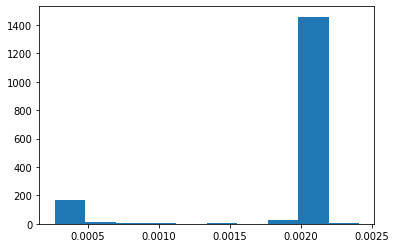

In [105]:
supp=apriori(basket, min_support=0.0001, use_colnames=True)['support']
plt.hist(supp)

In [114]:

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.0001, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.002142,(B003L62T7W)
1,0.002142,(B004IO5BMQ)
2,0.002142,(B008FWZGSG)
3,0.002142,(B008YW3CYM)
4,0.002142,(B008YW8M0G)
...,...,...
1687,0.002142,"(B0B4F4QZ1H, B0B4F1YC3J, B0B4F5L738, B0B4F2ZWL..."
1688,0.002142,"(B0B4F4QZ1H, B0B4F1YC3J, B0B4F5L738, B0B4F2ZWL..."
1689,0.002142,"(B0B4F4QZ1H, B0B4F5L738, B0B4F2ZWL3, B0B4F3QND..."
1690,0.002142,"(B09NKZXMWJ, B0B3MQXNFB, B08N1WL9XW, B09NJN8L2..."


In [115]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the association rules
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence','lift']])

Association Rules:
        antecedents                                        consequents  \
0      (B00NH13Q8W)                                       (B00NH11PEY)   
1      (B00NH11PEY)                                       (B00NH13Q8W)   
2      (B014I8SX4Y)                                       (B014I8SSD0)   
3      (B014I8SSD0)                                       (B014I8SX4Y)   
4      (B07KSMBL2H)                                       (B014I8SSD0)   
...             ...                                                ...   
15074  (B0B4F2ZWL3)  (B0B4F4QZ1H, B0B4F1YC3J, B0B4F5L738, B0B4F3QND...   
15075  (B0B4F3QNDM)  (B0B4F4QZ1H, B0B4F1YC3J, B0B4F5L738, B0B4F2ZWL...   
15076  (B0B4F2TTTS)  (B0B4F4QZ1H, B0B4F1YC3J, B0B4F5L738, B0B4F2ZWL...   
15077  (B0B4F52B5X)  (B0B4F4QZ1H, B0B4F1YC3J, B0B4F5L738, B0B4F2ZWL...   
15078  (B0B4F2XCK3)  (B0B4F4QZ1H, B0B4F1YC3J, B0B4F5L738, B0B4F2ZWL...   

        support  confidence    lift  
0      0.002142         1.0  466.75  
1      0.002142 

Interpretation: 
{Product A} -> {Product B}, Support: 0.05, Confidence: 0.8, Lift: 1.2      
In 5% of transactions, both Product A and Product B are purchased. When Product A is present in a transaction, there is an 80% chance that Product B will also be present. The presence of Product A increases the likelihood of purchasing Product B by 20% compared to when Product A is not present.


In [116]:

# Function to get recommendations based on association rules
def get_association_rule_recommendations(user_actions, rules=rules, min_confidence=0.02):
    # Create a set to store recommendations
    recommendations = set()

    # Create a DataFrame with only relevant rules
    #relevant_rules = rules[ rules['antecedents'].map(lambda x: bool(set(x) & set(user_actions)))]
    relevant_rules = rules[rules['antecedents'].apply(lambda x: any(item in user_actions for item in x))]
    # Filter rules based on confidence
    relevant_rules = relevant_rules[relevant_rules['confidence'] >= min_confidence]

    # Update recommendations set with consequents
    recommendations.update(consequents for consequents in relevant_rules['consequents'])

    return list(recommendations)  




In [117]:
def non_zero_columns(row):
    return [col for col, value in row.items() if value != 0]
basket_pred=basket.copy().astype('int')
#basket_pred.head()
basket_pred['all_products'] = basket_pred.apply(non_zero_columns, axis=1)


In [118]:
basket_pred['recomended_products']=basket_pred['all_products'].apply(get_association_rule_recommendations)

In [119]:
basket_pred['recomended_products'].apply(len).sort_values(ascending=False)

userid
AF355FTXYAKFH5NYPRTE7SL3WO3Q    254
AEBWA5I4QFCA3P3OBEPMELBGN4GQ    254
AE4KODNBVTDCZWZO4HZM4GTRERPA    254
AGFN4JODOM2NTFCJQOHDBQLVDJTQ    254
AE55KTFVNXYFD5FPYWP2OUPEYNPQ    254
                               ... 
AFIWT3CLAKB55S43VYSJ53PPBPQA      0
AFIXIYJE5BEMYL2TLUYPGAPYPC6A      0
AFIXXDE6EGSPL7Z3V2HM2ONLKILQ      0
AFJ5FUWKGY7XDPJOCMQ7EZQYHEFA      0
AFZECWTOM2GUH3T67XW26DXUIJNA      0
Name: recomended_products, Length: 3734, dtype: int64

In [121]:
basket_pred.loc['AE2JTMRKTUOIVIZWS2WDGTMNTU4Q','recomended_products']

[frozenset({'B084N133Y7'}), frozenset({'B084MZXJNK'})]